In [1]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('./homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [4]:
df.shape

(8188, 4)

In [9]:
len(df.id.unique())

6328

In [10]:
df[df['group']=='experiment'].shape

(3924, 4)

In [20]:
df[df['group']=='control'].shape

(4264, 4)

## About how long was this experiment run for?

In [59]:
from dateutil.parser import parse
date = parse('2016-09-24')

print(date.year)
print(date.month)
print(date.day)

2016
9
24


In [34]:
dates = df.timestamp.apply(parse)

In [56]:
print(max(dates))
print(min(dates))

2017-01-18 10:24:08.629327
2016-09-24 17:42:27.839496


In [58]:
latest, oldest = max(dates), min(dates)

interval = latest - oldest

print(interval)

115 days 16:41:40.789831


## What action types are recorded in this dataset? 



In [64]:
df.groupby('action').mean()

,id
action,
click,567004.084409
view,564022.432838


## Metric - Click Through Rate

* We computed the observed difference between the metric, click through rate, for the control and experiment group.



In [82]:
control_df = df.query('group=="control"' )

In [83]:
experiment_df = df.query('group=="experiment"' )
experiment_df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
4,2016-09-24 20:26:14.466886,536734,experiment,view
5,2016-09-24 20:32:25.712659,681598,experiment,view


In [84]:
control_ctr = len(control_df.query('action=="click"').id.unique()) / len(control_df.query('action=="view"').id.unique())
control_ctr

0.2797118847539016

In [78]:
experiment_ctr = len(experiment_df.query('action=="click"').id.unique()) / len(experiment_df.query('action=="view"').id.unique())
experiment_ctr

0.3097463284379172

In [85]:
obs_diff = experiment_ctr - control_ctr
obs_diff

0.030034443684015644

* We simulated the sampling distribution for the difference in proportions (or difference in click through rates).


In [86]:
diffs = []
for _ in range(10000):
    bootsample = df.sample(df.shape[0], replace=True)
    control_df = bootsample.query('group=="control"' )
    experiment_df = bootsample.query('group=="experiment"' )
    control_ctr = len(control_df.query('action=="click"').id.unique()) / len(control_df.query('action=="view"').id.unique())
    experiment_ctr = len(experiment_df.query('action=="click"').id.unique()) / len(experiment_df.query('action=="view"').id.unique())
    diffs.append(experiment_ctr-control_ctr)


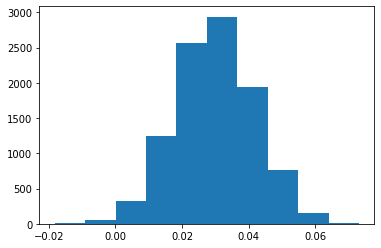

In [87]:
plt.hist(diffs);

In [90]:
np.std(diffs)

0.011833599236660743

* We used this sampling distribution to simulate the distribution under the null hypothesis, by creating a random normal distribution centered at 0 with the same spread and size.

* $H_0: CTR_n - CRT_o \le 0 $


In [93]:
diffs = np.array(diffs)
null_values = np.random.normal(0, diffs.std(), diffs.size)

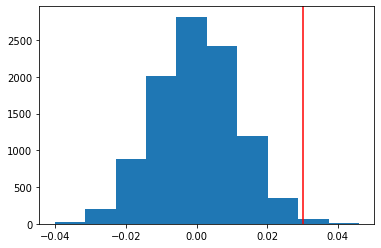

In [94]:
plt.hist(null_values)
plt.axvline(obs_diff, c='r')

In [95]:
(null_values > obs_diff).mean()

0.0059

* We computed the p-value by finding the proportion of values in the null distribution that were greater than our observed differenc

* With a p-value of less than 0.01, it seems unluckly that our statistics is from this null

* Therefore we reject the null hypothesis and Audacity should lunch the new version of the homepage!

**The second change Audacity is A/B testing is** a more career focused description on a course overview page. They hope that this change may encourage more users to enroll and complete this course. In this experiment, we’re going to analyze the following metrics:

* Enrollment Rate: Click through rate for the Enroll button the course overview page
* Average Reading Duration: Average number of seconds spent on the course overview page
* Average Classroom Time: Average number of days spent in the classroom for students enrolled in the course
* Completion Rate: Course completion rate for students enrolled in the course

First, let's determine if the difference observed for each metric is statistically significant individually.

